In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [5]:
# --- Load dataset ---
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# --- Hyperparameter Grid ---

param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [7]:
# --- GridSearchCV ---
dtr = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(
    dtr,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [8]:
# --- Best Model ---
best_dtr = grid.best_estimator_
y_pred = best_dtr.predict(X_test)

In [9]:
# --- Results ---
print("Best Parameters:", grid.best_params_)
print("Train R²:", r2_score(y_train, best_dtr.predict(X_train)))
print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train R²: 0.8228758679632282
Test R²: 0.6883315103959287
Test RMSE: 0.6390721297412019


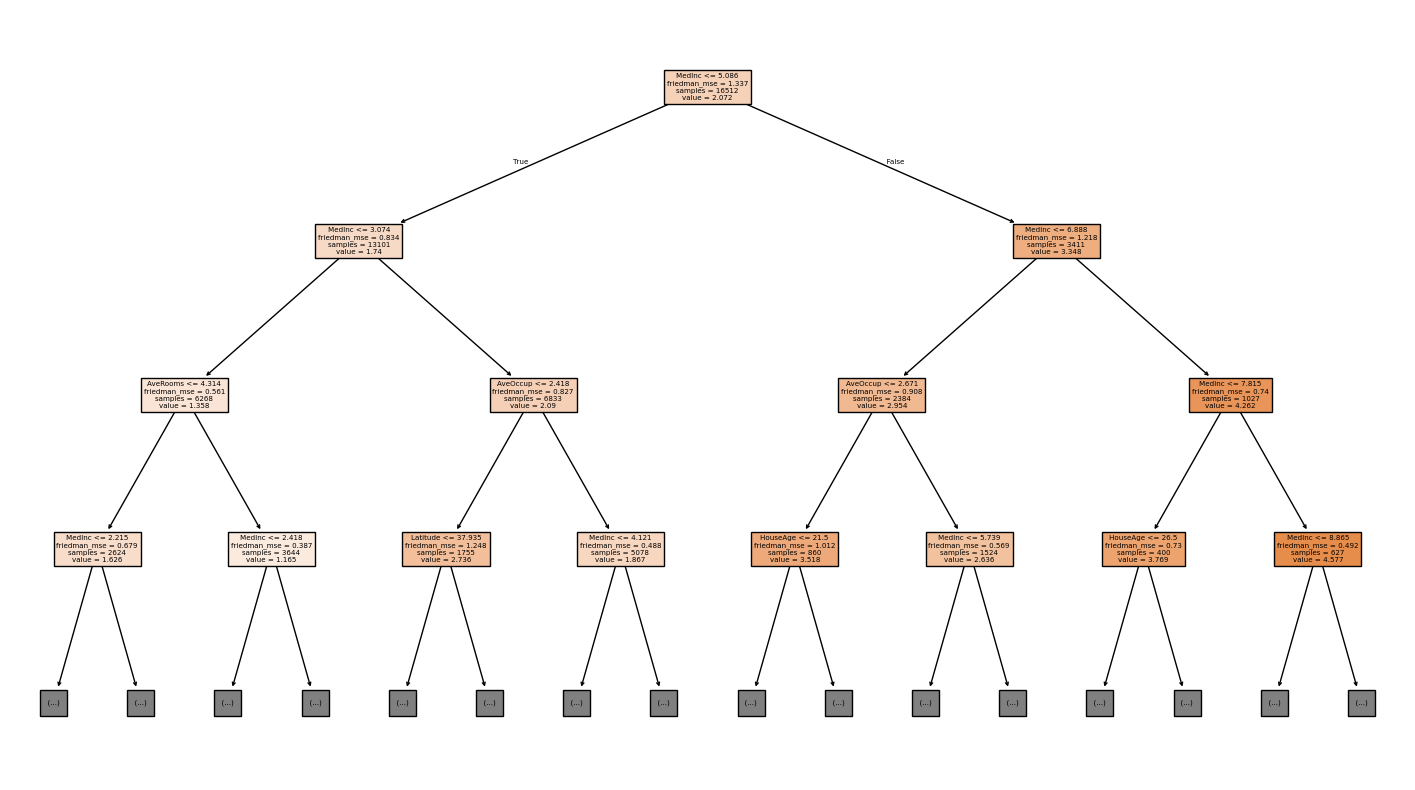

In [10]:
# --- Plot Tree ---
plt.figure(figsize=(18, 10))
plot_tree(best_dtr, filled=True, feature_names=data.feature_names, max_depth=3)  # limit depth for readability
plt.show()

In [11]:
dt = DecisionTreeRegressor(**grid.best_params_)
dt.fit(X_train, y_train)

,criterion,'friedman_mse'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [13]:
r2_score(y_test, y_pred)

0.6883604744368665

In [14]:
mean_squared_error(y_test, y_pred)

0.4083752322726645